In [1]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# ignore warnings to clean up output cells
simplefilter('ignore') 

In [3]:
# set matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [4]:
# Load tunnel traffic dataset
data_dir = Path('C:../../../Dataset/TimeSeries')
tunnel = pd.read_csv(data_dir/'tunnel.csv', parse_dates=['Day'])

In [5]:
# create a time series in pandas by setting the index to a date column
tunnel = tunnel.set_index('Day')

In [6]:
# PeriodIndex represents a time series as a sequence of quantities accumulated over periods of time
# on the other hand, by default, pandas creates a 'DatetimeIndex' with dtype 'Timestamp' which is equivalent to 'np.datetime64' 
# representing a time series as a sequence of measurements taken at single moments

tunnel = tunnel.to_period()

In [7]:
# time-step feature: provided the time series doesn't have any missing dates, 
# we can create a time dummy by counting out the length of the series
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [8]:
# the procedure for fitting a linear regression model to the data

from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']] # features
y = df.loc[:, ['NumVehicles']] # target

# Train the model
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)
flatten_y_pred = y_pred.flatten()
# Store the fitted values as a time series with the same time index as the training data
flatten_y_pred = pd.Series(flatten_y_pred, index=X.index)

Text(0.5, 1.0, 'Time plot of tunnel traffic')

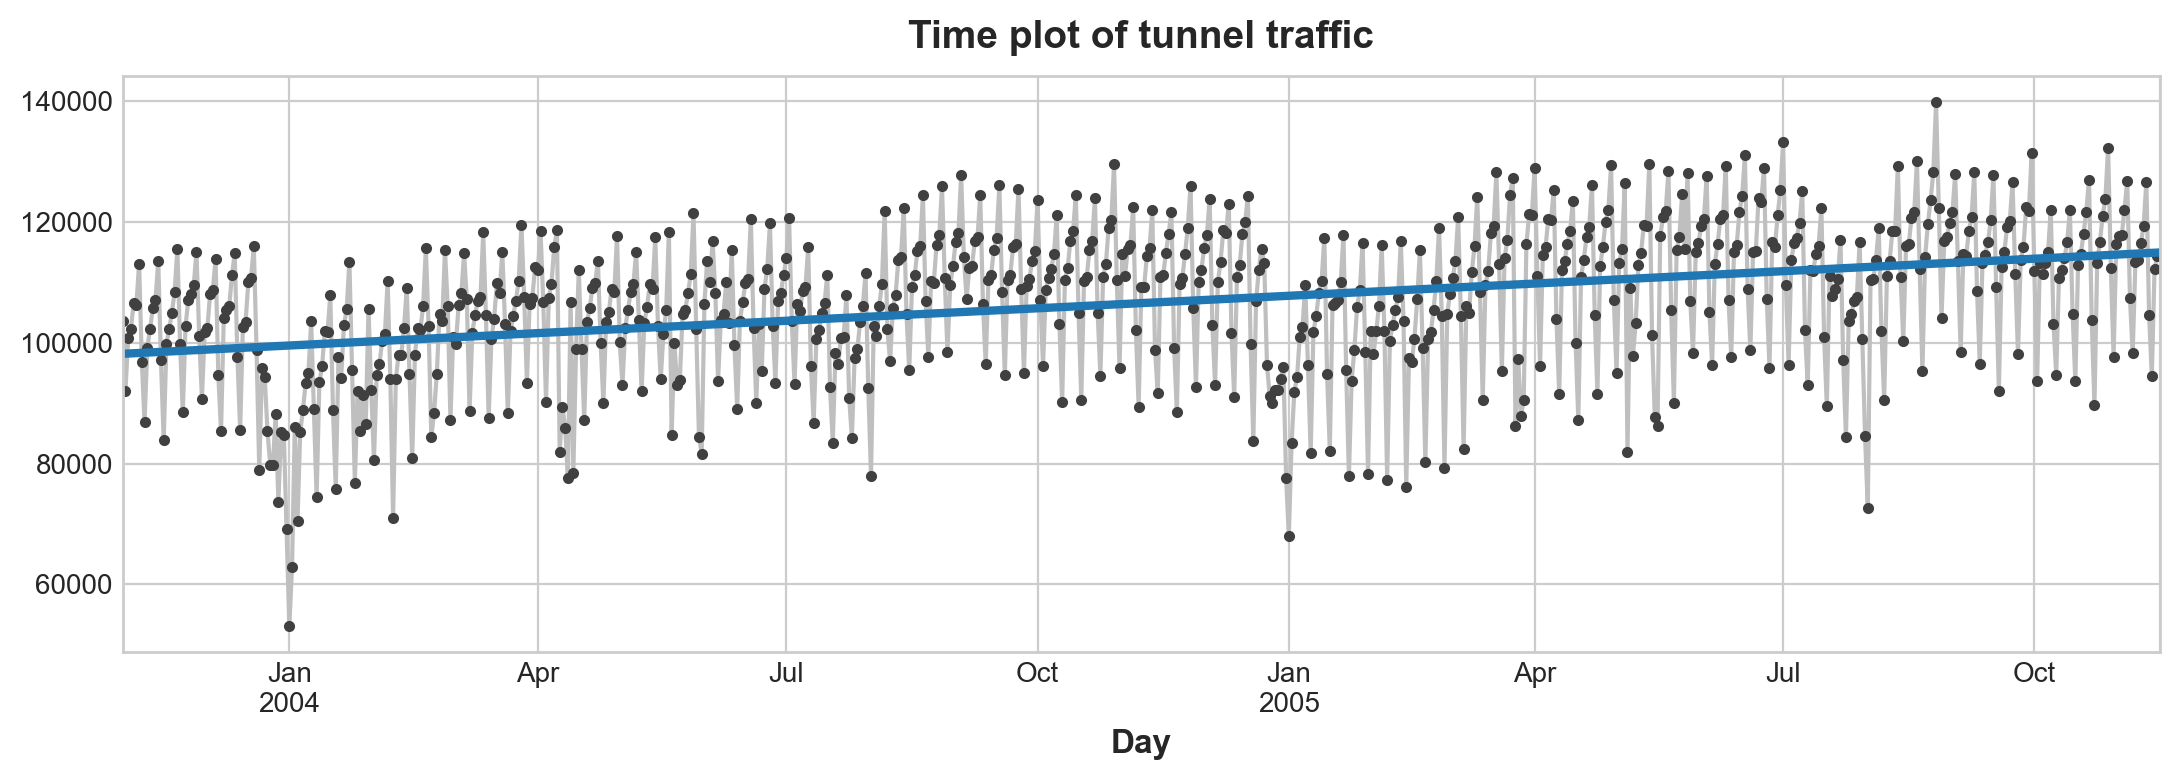

In [12]:
ax = y.plot(**plot_params)
ax = flatten_y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time plot of tunnel traffic')

In [14]:
# Lag features
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [15]:
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df.loc[:, 'NumVehicles']
y,X = y.align(X, join='inner')

model.fit(X,y)

y_pred = model.predict(X)
flatten_y_pred = y_pred.flatten()
# Store the fitted values as a time series with the same time index as the training data
flatten_y_pred = pd.Series(flatten_y_pred, index=X.index)

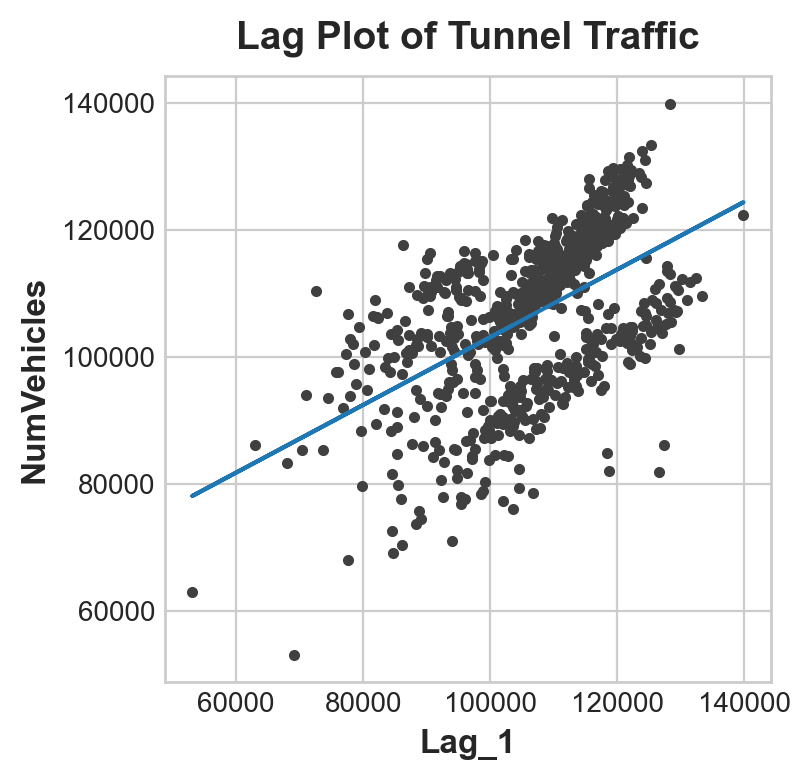

In [16]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], flatten_y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

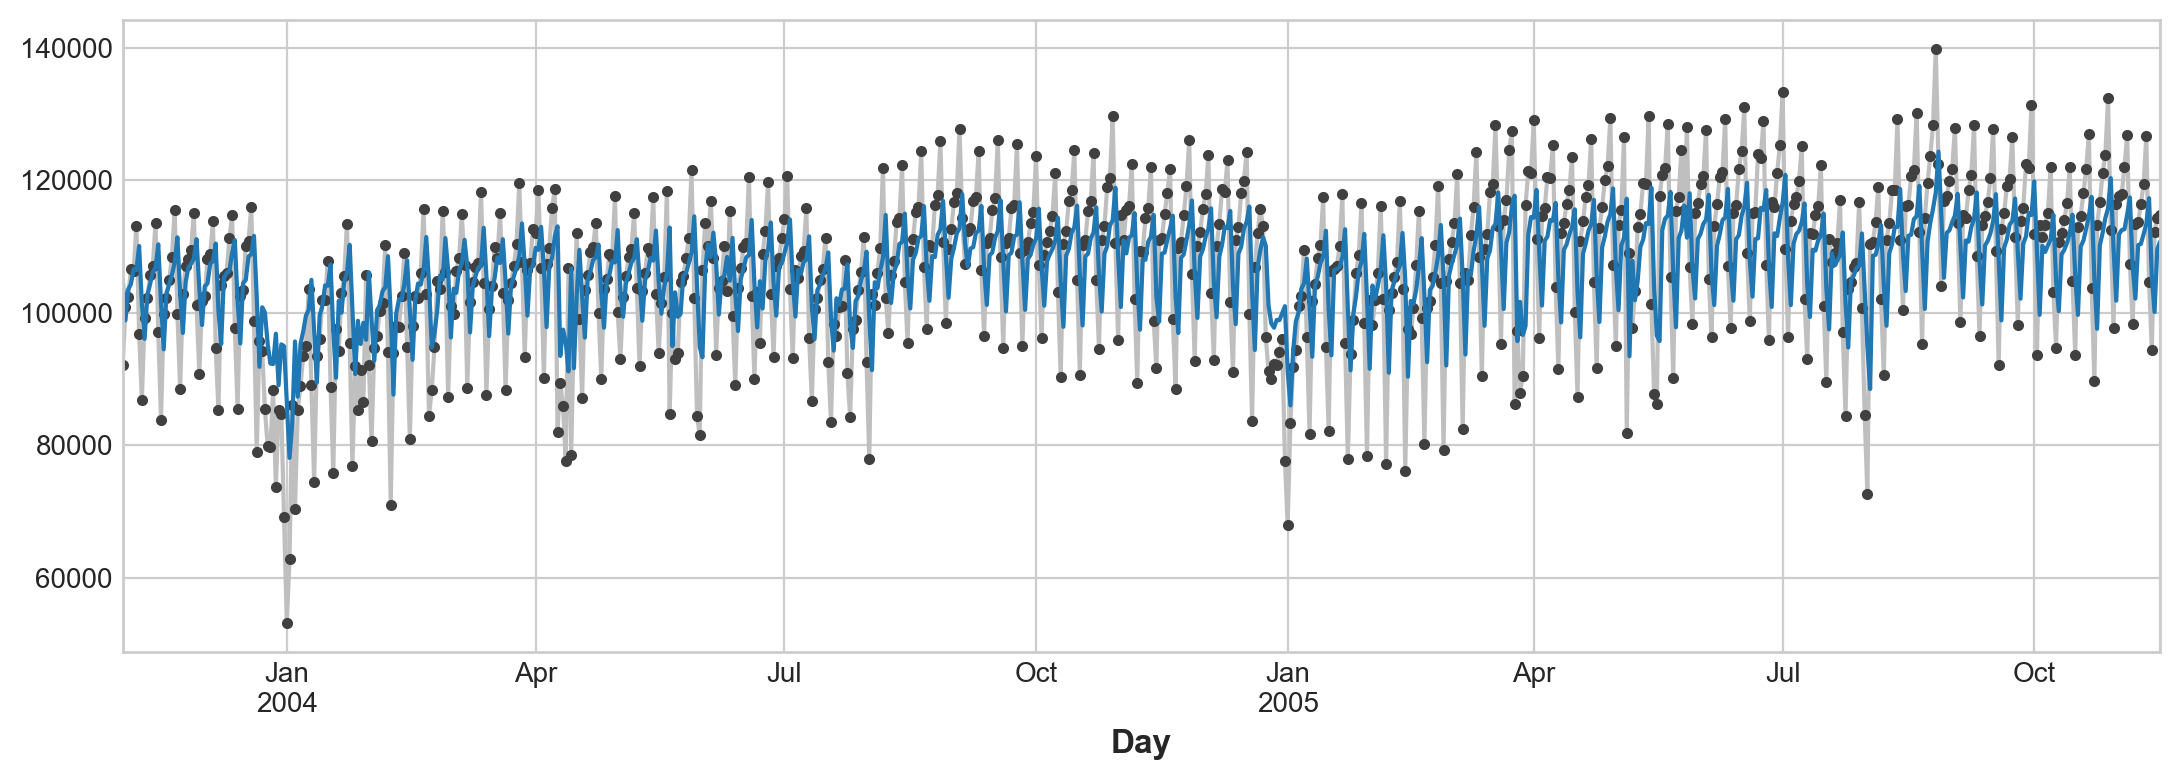

In [17]:
ax = y.plot(**plot_params)
ax = flatten_y_pred.plot()